In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('heart_data.csv')
df.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,498.0,249.500000,143.904482,1.000000,125.250000,249.500000,373.750000,498.000000
biking,498.0,37.788411,21.481519,1.119154,20.204598,35.824459,57.852786,74.907111
smoking,498.0,15.435034,8.289959,0.525850,8.279776,15.814614,22.568925,29.946743
heart.disease,498.0,10.174538,4.571874,0.551898,6.513683,10.385255,13.724024,20.453496


In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

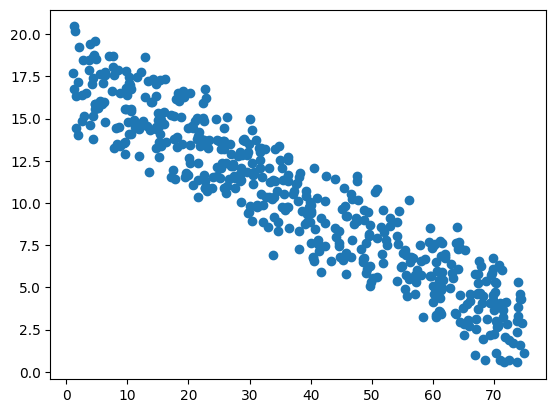

In [28]:
plt.scatter(df['biking'], df['heart.disease'])
plt.show()

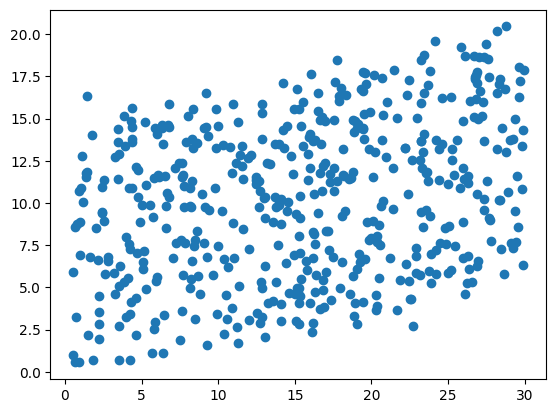

In [29]:
plt.scatter(df['smoking'], df['heart.disease'])
plt.show()

In [30]:
X = df[['smoking', 'biking']]
X.head(2)

,smoking,biking
0,10.896608,30.801246
1,2.219563,65.129215


In [31]:
y = df['heart.disease']
y[:2]

0    11.769423
1     2.854081
Name: heart.disease, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=56)

In [33]:
X_train.shape, X_test.shape

((348, 2), (150, 2))

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [35]:
lr.coef_, lr.intercept_

(array([ 0.18093894, -0.20016246]), 14.955573445126605)

In [36]:
lr.predict([[10.896608, 30.801246]])

array([10.76194111])

In [37]:
x_train_1 = X_train.copy()
x_train_1['Prediction'] = lr.predict(X_train)
x_train_1['Actual'] = y_train

In [38]:
x_train_1

,smoking,biking,Prediction,Actual
93,28.182873,31.932738,13.663217,13.173741
292,8.032981,4.341424,15.540062,15.172716
164,9.147502,35.335113,9.537950,9.751894
20,14.855106,28.510129,11.936783,11.724742
158,24.792638,59.575645,7.516720,8.519928
...,...,...,...,...
418,14.255287,6.057336,16.322459,17.133745
192,7.797383,31.212374,10.118878,9.775386
399,7.646038,61.008149,4.127498,3.598679
484,1.024756,22.719661,10.593369,10.893894


In [39]:
lr.score(X_train, y_train)

0.9793194153890532

In [40]:
lr.score(X_test, y_test)

0.9801007964156312

In [42]:
X_test_1 = X_test.copy()
X_test_1['Prediction'] = lr.predict(X_test)
X_test_1['Actual'] = y_test
X_test_1

,smoking,biking,Prediction,Actual
101,29.423738,64.332304,7.402561,7.707398
66,14.306635,23.276821,12.885055,13.266385
342,19.060571,19.909001,14.419338,14.466013
385,24.206585,65.201713,6.284552,7.184946
237,22.342603,9.937617,17.009083,16.384678
...,...,...,...,...
432,9.176467,3.220291,15.971372,16.499639
483,14.963219,55.663943,6.521171,6.916259
296,10.623923,54.821433,5.904662,6.223784
49,18.941348,21.127498,14.153869,14.825362


In [45]:
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

In [46]:
lr_model = pickle.load(open('model.pkl', 'rb'))

In [47]:
lr_model.predict([[10.896608, 30.801246]])

array([10.76194111])